This algorithm uses Monte Carlo simulation to predict the future value of securities. The algorithm calculates future prices by utilizing a formula for drift with a stochastic offset: P1 = P0 * exp(N(rand(), μ, σ)) Where μ and σ denote the data's geometric mean and standard deviation, respectively, and N() denotes the normal distribution.

In [1]:
import autograd.numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

In [2]:
csvname = 'SPX Adj Close.csv'
data = np.loadtxt(csvname,delimiter = ',')

dateVals = data[:,:-1].flatten()
closeVals = data[:,-1:].flatten()

numSim = 10**(5) #number of simulations
lenFor = 250 #length of forecast (days)

In [3]:
dataSize = len(closeVals)
lnRatio = []
for i in range(1,dataSize):
    lnRatio.append(np.log(closeVals[i]/closeVals[i-1]))

avgRatio = np.mean(lnRatio)
stdRatio = np.std(lnRatio)

firstVal = closeVals[dataSize-1]
endVal = np.ones(numSim) * firstVal
for l in range(lenFor):
    endVal = endVal*np.exp(norm.ppf(np.random.rand(1,numSim),loc=avgRatio, scale=stdRatio))

mean closing value after 250 days: 3152.32
standard deviation of closing value after 250 days: 388.09


<IPython.core.display.Javascript object>


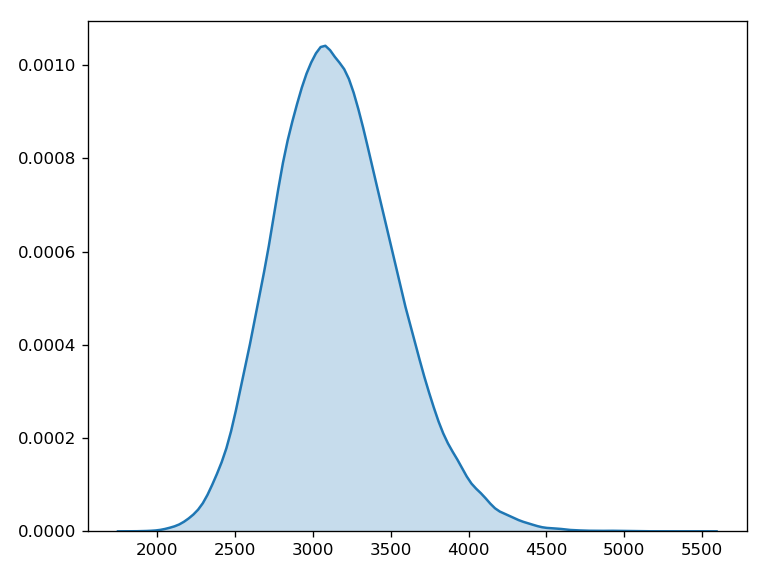

In [4]:
print("mean closing value after", lenFor, "days:", round(np.mean(endVal[0]),2))
print("standard deviation of closing value after", lenFor, "days:", round(np.std(endVal[0]),2))
sns.kdeplot(endVal[0], shade=True)

In [5]:
forecastVals = []
for j in range(0, lenFor):
    if j == 0:
        forecastVals.append(closeVals[dataSize-1]*np.exp(norm.ppf(np.random.rand(),loc=avgRatio, scale=stdRatio)))
    else:
        forecastVals.append(forecastVals[j-1]*np.exp(norm.ppf(np.random.rand(),loc=avgRatio, scale=stdRatio)))

<IPython.core.display.Javascript object>


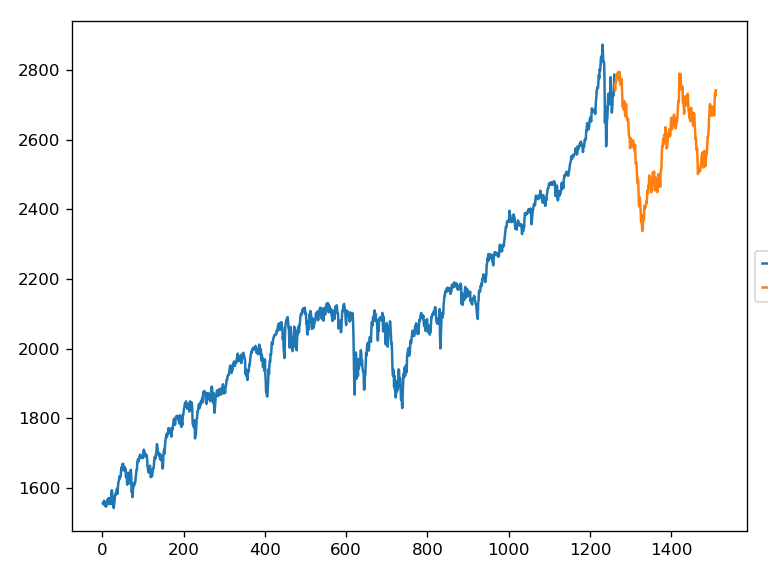

In [6]:
yt1 = closeVals
xt1 = np.linspace(1,yt1.size,yt1.size)
yt2 = np.array(forecastVals)
xt2 = np.linspace(yt1.size+1,yt1.size+yt2.size,yt2.size)

plt.figure()
plt.plot(xt1,yt1)
plt.plot(xt2,yt2)
plt.legend(['given data','sample forecast'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()